## Pre-processing
* One-hot encode categorical variables.
* Train/test split your data.
* Scale your data as needed.
*  Consider using automated feature selection.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [113]:
df_house = pd.read_csv('./datasets/train.csv')
pd.set_option('display.max_columns', None)
df_house

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN

At first glance and from what I know about homes and home buying, I'm seeing a ton of really great features that could potentially be great predictors as well. Let's dig in.

In [114]:
df_house.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [115]:
df_house.columns = df_house.columns.str.lower().str.replace(' ', '_')

In [116]:
df_house.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [117]:
df_house.isnull().sum().loc[lambda x: x>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

I'm seeing a ton of missing values. I'm going to get rid of the rows that have 1000+ missing data points. I am doing this because that feature will likely end up not being valuable to us anyways because so much of the data is missing. At the same time, I will go ahead and get rid of the 'id' and 'pid' columns since those are simply identifier information not relevant to our analysis on sale prices.

In [118]:
df_house.drop(columns=['alley',
                 'fireplace_qu',
                 'pool_qc',
                 'fence',
                 'misc_feature',
                 'pid'], inplace=True)

In [119]:
df_house.isnull().sum().loc[lambda x: x>0]
# Ensuring it stuck

lot_frontage      330
mas_vnr_type       22
mas_vnr_area       22
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_sf_1        1
bsmtfin_type_2     56
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_type       113
garage_yr_blt     114
garage_finish     114
garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
dtype: int64

In [120]:
df_house.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_a

Alright! Now that we've done that short fix - I'm going to do some initial visualizations and deeper cleans.

In [121]:
df_house = df_house[df_house['gr_liv_area'] < 4000]

<AxesSubplot:xlabel='gr_liv_area'>

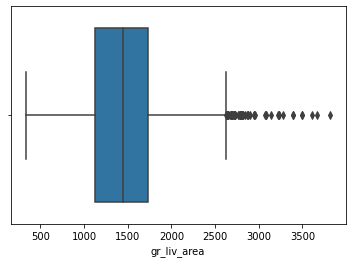

In [122]:
sns.boxplot(df_house['gr_liv_area'])

In [123]:
df_house.head(3)

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000


In [124]:
df_house.shape

(2049, 75)

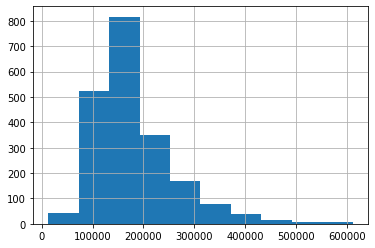

In [125]:
df_house['saleprice'].hist();  # Looking at the distribution of my target variable

It appears the distribution of the target variable saleprice is slightly skewed right. A log may be able to fix this. I also see that there are some values that are very close to zero - I wonder if these are family sales or foreclosures. It may be worth looking into these as they are outliers. 

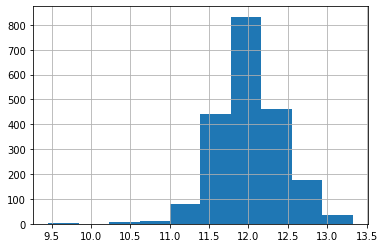

In [126]:
np.log(df_house['saleprice']).hist();   # Testing to see if a log transformation might be worth it later on 

Again, here we can see how the log transformation fixed the distribution but the dataset still contains those outliers that are so close to zero.

As far as the features go, instead of looking at a giant pairplot of all numerical data, I wanted to look at just the features that had a correlation with the target variable of over 0.5 absolute. I got help with this from this article about feature selection: [*Source*](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

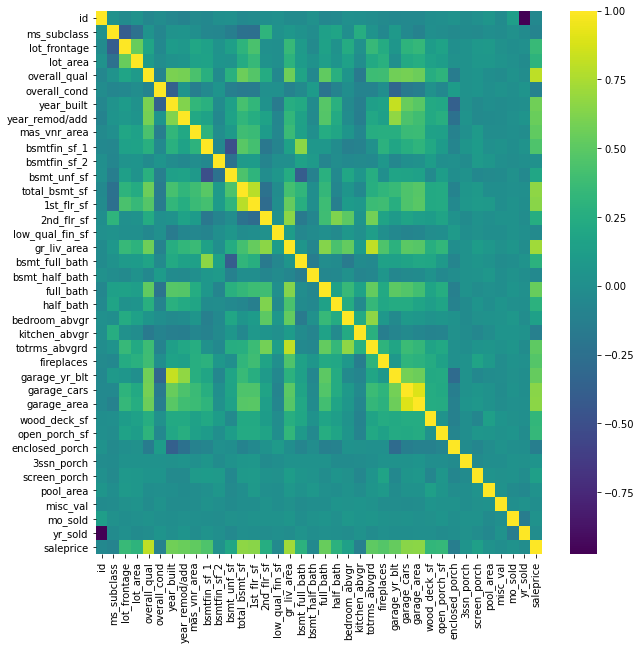

In [127]:
plt.figure(figsize=(10,10))   
sns.heatmap(df_house.corr(), cmap='viridis');

First, I wanted to look at a quick heatmap of the numeric data to check for multicolinearity. It appears there are quite a few features that are colinear relative to our target saleprice.

In [128]:
cor = df_house.corr()
cor_target = abs(cor['saleprice'])
correlated_features = cor_target[cor_target>0.5]
correlated_features

overall_qual      0.803462
year_built        0.572405
year_remod/add    0.550872
mas_vnr_area      0.520023
total_bsmt_sf     0.664819
1st_flr_sf        0.648252
gr_liv_area       0.719463
full_bath         0.538225
totrms_abvgrd     0.509775
garage_yr_blt     0.534514
garage_cars       0.648667
garage_area       0.655483
saleprice         1.000000
Name: saleprice, dtype: float64

Since we have so many columns and potential ways to go with this, I will start by running a simple Linear Regression with a few numeric variables. Then I will run a Lasso with all numeric variables. I believe these two models will give me a good foundation to view the data without feeling too overwhelmed by its size.

To start with the Linear Regression, I will look at:
* Year remodeled
* Above ground living area, square feet
* Total rooms above ground
* Overall quality 
* Garage area 

I have chosen these out of the above correlations simply from outside knowledge of being good things to look at for a house. I also examined these against the heatmap above. I was going to use year built in this set, but it is very colinear with overall quality. Therefore, I used year remodeled instead as it still is correlated with saleprice but it is not so highly correlated with another feature here. 

*Help from Caroline with this idea as I had some coder's block.*

In [129]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [130]:
df_nums = df_house.select_dtypes(include=[np.number])
df_nums.head(3)

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000


In [131]:
df_house.select_dtypes(include=[np.object_])

,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD
2047,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD
2048,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Detchd,Unf,Fa,Fa,Y,WD
2049,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD


In [132]:
df_house

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,20,RL,79.0,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,0,1,2008,WD,298751
2047,785,30,RL,NaN,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,0,3,2009,WD,82500
2048,916,50,RL,57.0,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,0,3,2009,WD,177000
2049,639,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,750.0,295.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,1.0,0.0,1,0,3,1,TA,6,Typ,2,Attchd,1956.0,Unf,1.0,294.0,TA,TA,Y,0,189

In [133]:
df_cat = df_house[['id', 'neighborhood', 'house_style', 'exter_qual', 'kitchen_qual']]

In [134]:
df_cat

,id,neighborhood,house_style,exter_qual,kitchen_qual
0,109,Sawyer,2Story,Gd,Gd
1,544,SawyerW,2Story,Gd,Gd
2,153,NAmes,1Story,TA,Gd
3,318,Timber,2Story,TA,TA
4,255,SawyerW,1.5Fin,TA,TA
...,...,...,...,...,...
2046,1587,Timber,1Story,Gd,Gd
2047,785,Edwards,1Story,TA,TA
2048,916,Crawfor,1.5Fin,TA,TA
2049,639,NAmes,1Story,TA,TA


In [135]:
df_combined = pd.merge(left = df_nums, right = df_cat, how = 'inner')

In [136]:
df_combined

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,neighborhood,house_style,exter_qual,kitchen_qual
0,109,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,Sawyer,2Story,Gd,Gd
1,544,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,SawyerW,2Story,Gd,Gd
2,153,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,NAmes,1Story,TA,Gd
3,318,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,Timber,2Story,TA,TA
4,255,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,SawyerW,1.5Fin,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,1587,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,520.0,0,276,0,0,0,0,0,1,2008,298751,Timber,1Story,Gd,Gd
2045,785,30,NaN,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,539.0,158,0,0,0,0,0,0,3,2009,82500,Edwards,1Story,TA,TA
2046,916,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,342.0,0,0,0,0,0,0,0,3,2009,177000,Crawfor,1.5Fin,TA,TA
2047,639,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,295.0,1200.0,1200,0,0,1200,1.0,0.0,1,0,3,1,6,2,1956.0,1.0,294.0,0,189,140,0,0,0,0,11,2009,144000,NAmes,1Story,TA,TA


In [137]:
X = df_combined.drop(columns=['id', 'saleprice'])
y = df_combined['saleprice']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [138]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [139]:
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(handle_unknown='ignore')
smart_encoder = make_column_transformer((ohe,
                                        ['neighborhood', 'house_style', 'exter_qual', 'kitchen_qual']),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

X_train_enc = smart_encoder.fit_transform(X_train)
X_val_enc = smart_encoder.transform(X_val)

X_train_enc = pd.DataFrame(X_train_enc, columns = smart_encoder.get_feature_names_out())
X_val_enc = pd.DataFrame(X_val_enc, columns = smart_encoder.get_feature_names_out())

In [140]:
si = SimpleImputer(strategy = 'mean')

X_train_fill = si.fit_transform(X_train_enc)
X_val_fill = si.transform(X_val_enc)

In [141]:
X_train_fill = pd.DataFrame(X_train_fill, columns = si.feature_names_in_)
X_val_fill = pd.DataFrame(X_val_fill, columns = si.feature_names_in_)

In [142]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_fill)
X_val_sc = ss.transform(X_val_fill)

X_train_sc = pd.DataFrame(X_train_sc, columns = ss.get_feature_names_out())
X_val_sc = pd.DataFrame(X_val_sc, columns = ss.get_feature_names_out())

In [143]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 10).fit(X_train_sc, y_train)

print('best alpha:', lasso_cv.alpha_)
print('score:', lasso_cv.score(X_train_sc, y_train))

best alpha: 294.3665111484536
score: 0.9147164487058445


In [144]:
lasso_cv.score(X_val_sc, y_val)

0.9209348090028185

In [163]:
from sklearn.compose import TransformedTargetRegressor
tt = TransformedTargetRegressor(regressor = lasso_cv, func = np.log, inverse_func = np.exp)

In [164]:
tt.fit(X_train_sc, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LassoCV(cv=10))

In [165]:
tt.score(X_train_sc, y_train)

0.9348260075279748

In [166]:
tt.score(X_val_sc, y_val)

0.9359349820822778

In [167]:
y_train_preds = tt.predict(X_train_sc)

In [168]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_preds)

408790928.037594

In [170]:
y_val_preds = tt.predict(X_val_sc)
mean_squared_error(y_val, y_val_preds)

405026382.67821234

In [147]:
df_test = pd.read_csv('./datasets/test.csv')

df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

test_id = df_test['id']

df_test.drop(columns=['alley',
                 'fireplace_qu',
                 'pool_qc',
                 'fence',
                 'misc_feature',
                 'pid'], inplace=True)

df_nums_test = df_test.select_dtypes(include=[np.number])
df_cat_test = df_test[['id', 'neighborhood', 'house_style', 'exter_qual', 'kitchen_qual']]
df_combined_test = pd.merge(left = df_nums_test, right = df_cat_test, how = 'inner')

X = df_combined_test.drop(columns=['id'])

In [148]:
X.head(3)

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,neighborhood,house_style,exter_qual,kitchen_qual
0,190,69.0,9142,6,8,1910,1950,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1910.0,1,440,0,60,112,0,0,0,0,4,2006,OldTown,2Story,TA,Fa
1,90,NaN,9662,5,4,1977,1977,0.0,0,0,1967,1967,1967,0,0,1967,0,0,2,0,6,2,10,0,1977.0,2,580,170,0,0,0,0,0,0,8,2006,Sawyer,1Story,TA,TA
2,60,58.0,17104,7,5,2006,2006,0.0,554,0,100,654,664,832,0,1496,1,0,2,1,3,1,7,1,2006.0,2,426,100,24,0,0,0,0,0,9,2006,Gilbert,2Story,Gd,Gd


In [149]:
X_enc = smart_encoder.transform(X)

X_enc = pd.DataFrame(X_enc, columns = smart_encoder.get_feature_names_out())


In [150]:

X_fill = si.transform(X_enc)

X_fill = pd.DataFrame(X_fill, columns = si.feature_names_in_)


In [151]:

X_sc = ss.transform(X_fill)

X_sc = pd.DataFrame(X_sc, columns = ss.get_feature_names_out())

In [152]:
print('best alpha:', lasso_cv.alpha_)
print('score:', lasso_cv.score(X_sc, y))

best alpha: 294.3665111484536


ValueError: Found input variables with inconsistent numbers of samples: [2049, 878]

In [153]:
preds = lasso_cv.predict(X_sc)

In [154]:
df_test['saleprice'] = preds

In [155]:
submission = df_test[['id', 'saleprice']]

In [156]:
submission.shape

(878, 2)

In [157]:
submission.head()

,id,saleprice
0,2658,132269.681075
1,2718,160644.852775
2,2414,205190.322418
3,1989,108300.720249
4,625,180485.287167


In [158]:
submission.to_csv('./datasets/lasso_4.csv', index=False)

YOU NEED TO PUSH THINGS TO GITHUB

CLEAN UP YOUR NOTEBOOKS AND GET ORGANIZED

MODEL THAT YOU LIKE IS ON 2 OR 3 I THINK

IF YOU CHANGE TO 3 MAKE SURE YOU ADD TARGET TRANSFORMER

KAGGLE MODEL IS ON 4

DO SOME METRICS AND FIGURE OUT A 'STORY' THAT MAKES SENSE

FIGURE OUT WHAT TO DO FOR VIZ ???? WHY DOES AMANDA WANT TO DO A VIOLIN PLOT ??????

VERY CONFUSED ABT THAT

PAY ATTENTION TO THE PROJECT RUBRIC AND MAKE SURE YOURE CHECKING OFF ALL THINGS ON THERE

BASIC LINEAR AND NULL MODEL ARE ON 1

PROBLEM STATEMENT: 
    I work on an analytics team for a big realty company in Iowa. Realtor team wants to look at what factors drive up home prices to we can understand how to best make recommendations to our clients and what they want in a home. Will what they want typically be in a home that is more expensive or less expensive?
    What features drive up 
    
    Specific: I want to look at this housing data to be able to assist clients in predicting what would drive up the value of their home they are trying to sell.
    
    Measureable: I will make a model that uses a regression model to see what features best predict sale price of homes. Then I can predict these factors for my clients. 
    
    Achievable: I know how to do regression models and we have learned everything I will use. 
    
    Relevant: Can help people who want to sell their home, presenting as a part of the analytics team to the realty group that directly deals with clients. 
    
    Time bound: Data set is from 2006 to 2010. A time when the housing market was a bit hectic. Housing market is doing similar things right now. The predictions I could make based on this data may be quite applicable now. 